In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

In [2]:
def func(x):
    return x**2 - 2

In [25]:
#動画用
def bisec(func , x_max : float, x_min : float, LIMIT = 1e-10 ):
    
    import time
    start = time.time()
    
    x_mid = ( x_max + x_min ) / 2  
    i = 0
    
    while(  x_max - x_mid   > LIMIT ):
        
        if func( x_mid ) > 0:
            x_max = x_mid
            
        elif func( x_mid ) == 0 :
            break
        else:
            x_min = x_mid
        
        x_mid =( x_min + x_max ) / 2
        i += 1
      
    print(i)
    print(time.time() - start)    
    print(x_mid)

In [29]:
bisec(func, 1.5, 1.2)

31
0.0
1.4142135623143985


In [41]:
# 動画
def bisec(func , x_max : float, x_min : float, answer : float= np.nan ,movie = False, LIMIT = 1e-10 ):
    
    import time
    
    
    x_mid = ( x_max + x_min ) / 2  
    start = time.time()
    

    if movie:
        
        import matplotlib.animation as animation
        DIR = "./img_tmp_{}".format(time.time())
        
        os.makedirs(DIR, exist_ok=True)
        os.chmod(DIR, 644)
        
        fig = plt.figure()
        
        R = np.arange(0.1, LIMIT, -0.01)
        
        
        ims = []
        i = 0
        er = 1
        E = 0.01
        
        rr = (x_max - x_mid) + E
        
        x_r_min = x_mid - rr
        x_r_max = x_mid + rr
            
        y_r = max(func(x_r_min - rr), func(x_r_max + rr))
            
        
        
        
        x = np.arange(x_min - 0.1, x_max + 0.1, E)
        
        
    while( np.abs( x_mid - x_max ) > LIMIT ):
        
        if movie:
            
            r = x_max - x_mid
            
            if r / rr < E:
                
                er += 5
                E = 10**(-1*er)
                
                rr = x_max - x_mid + E
                
                
                x = np.arange(x_min - rr, x_max + rr, E)
                
                
                x_r_min = x_mid - rr
                x_r_max = x_mid + rr
                
                y_r = max(func(x_r_min - rr ), func(x_r_max + rr))
                
            
            
            plt.title("n = {:05}  :   {}".format( i, x_mid ))
            plt.xlim([x_r_min, x_r_max])
            
            plt.hlines(0, xmin =x_r_min, xmax = x_r_max, linewidth = 0.5, color = "blue")
            
            if answer:
                plt.vlines(answer, ymin = -y_r, ymax = y_r, linewidth = 0.5, color = "blue")
            
            plt.ylim([ -y_r, y_r])
            
            plt.plot( x, func(x), c = "k")
            plt.grid(True)
            plt.legend()
            
            line = plt.scatter( [ x_min, x_mid, x_max ], [ func(x_min), func(x_mid), func(x_max) ], c = ["red", "purple", "blue"], label = [ "min", "mid", "max" ])
            
            plt.savefig(os.path.join( DIR, "img_{:05d}.png".format(i)))
            
            i+=1
            
            
        if func( x_mid ) > 0:
            x_max = x_mid
            
        elif func( x_mid ) == 0 :
            break
        else:
            x_min = x_mid
        
        
        
        x_mid =( x_min + x_max ) / 2
    
    if movie:
        from PIL import Image
        from glob import glob
        images = []

        for path in glob(os.path.join(DIR, "*.png")):

            im = Image.open(path)
            images.append(im)
        
        
        os.makedirs("./gif", exist_ok=True)
        images[0].save('./gif/bisec.gif', save_all=True, append_images=images[1:], loop=0, duration=500)
        
        
        
        os.remove(DIR)
    print(time.time() - start)    
    print(x_mid)

No handles with labels found to put in legend.


PermissionError: [WinError 5] アクセスが拒否されました。: './img_tmp_1586249067.7490404'

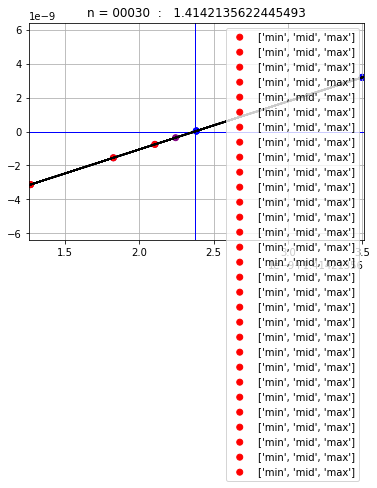

In [42]:
bisec(func, 1.5, 1.2, answer = np.sqrt(2),movie=True)